# Data Cleaning & Exploration


Keywords to know:

LI - Low Income
LA - Low Access

Data Dictionaries can be found under `datasets/original_data_files` in the second sheets of the original Excel files. 

More information on data decisions can be found in `datasets/original_data_files/FoodAccessResearchAtlasDocumentation2010.pdf`

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [72]:
data_2019 = pd.read_csv('datasets/2019.csv', index_col=0)

In [73]:
data_2010 = pd.read_csv('datasets/2010.csv', index_col=0)

The 2019 dataset has 147 columns. The 2010 dataset has 65 columns. 

In [74]:
data_2019.columns = data_2019.columns.str.lower()

In [75]:
data_2019.head()

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,0,0,0,0,0,11.336453,81250.0,1,1,1,1,1,0,0,0,1896.493338,1912.000004,1896.493338,460.998748,466.972228,460.998748,1912.000004,100.000000,466.972228,24.423234,507.000002,26.516736,221.000002,11.558578,1622.000008,84.832636,216.999999,11.349372,14.000000,0.732218,0.000000,0.000000,14.000000,0.732218,45.000000,2.353556,44.000000,2.301255,5.490446,0.792272,92.400001,13.333333,1896.493338,99.188982,460.998748,24.110813,503.506034,26.333998,218.674825,11.436968,1610.956368,84.255040,213.631073,11.173173,13.800985,0.721809,0.000000,0.000000,14.000000,0.732218,44.104914,2.306742,43.365253,2.268057,5.490446,0.792272,91.580907,13.215138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.0,507.0,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,1,1,0,0,1,17.876788,49000.0,1,1,1,1,1,0,0,0,1260.991651,2169.999998,1260.991651,603.892737,962.199453,603.892737,2169.999998,100.000000,962.199453,44.340989,606.000004,27.926267,214.000001,9.861751,888.000003,40.921659,1216.999994,56.082949,5.000000,0.230415,0.000000,0.000000,5.000000,0.230415,55.000001,2.534562,75.000001,3.456221,92.673554,12.472887,161.207233,21.696801,1260.991651,58.110214,603.892737,27.829158,405.660951,18.694053,126.604568,5.834312,356.617747,16.433998,854.189485,39.363571,4.000000,0.184332,0.000000,0.000000,4.396176,0.202589,41.788244,1.925726,32.980882,1.519856,66.903537,9.004514,96.208100,12.948600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,802.0,606.0,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,0,0,0,0,0,15.046030,62609.0,1,1,1,1,1,0,0,0,1551.703935,2856.859242,1551.703935,478.260886,971.112475,478.260886,2856.859242,84.697873,971.112475,28.790764,771.040463,22.859190,357.634554,10.

In [76]:
data_2010.columns = data_2010.columns.str.lower()

In [77]:
data_2010.head()

,censustract,state,county,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,urban,rural,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,hunvflag,groupquartersflag,ohu2010,numgqtrs,pctgqtrs,lowincometracts,pop2010,uatyp10,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lahunvhalf,lahunvhalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lahunv1,lahunv1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lahunv10,lahunv10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lahunv20,lahunv20share
0,1001020100,AL,Autauga,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,693,0.0,0.000000,0,1912,U,1732.225468,0.905976,306.546737,0.160328,466.426429,0.919973,198.828220,0.899675,44.212100,0.063798,1357.480940,0.709980,245.277225,0.128283,363.638381,0.717235,162.497246,0.735282,31.579173,0.045569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001020200,AL,Autauga,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,743,181.0,0.083410,0,2170,U,1410.374828,0.649942,484.905037,0.223459,448.163512,0.739544,139.305390,0.650960,86.423433,0.116317,483.429683,0.222779,170.838823,0.078728,174.770469,0.288400,50.976822,0.238209,34.398590,0.046297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001020300,AL,Autauga,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,1256,0.0,0.000000,0,3373,U,2764.604126,0.819628,773.419284,0.229297,744.891575,0.833212,346.203097,0.788618,54.188593,0.043144,1417.874893,0.420360,380.786290,0.112892,377.128132,0.421844,190.001480,0.432805,19.156371,0.015252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1001020400,AL,Autauga,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,1722,0.0,0.000000,0,4386,U,4272.112205,0.974034,874.067405,0.199286,980.143479,0.965659,892.805993,0.987617,16.964191,0.009851,1909.275364,0.435311,311.160977,0.070944,470.411544,0.463460,374.051202,0.413773,3.926144,0.002280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1001020500,AL,Autauga,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,4082,181.0,0.016812,0,10766,U,7798.993990,0.724410,1131.052984,0.105058,2314.376847,0.731934,843.200608,0.748846,177.089308,0.043383,2753.648392,0.255773,373.426978,0.034686,745.740558,0.235845,373.826962,0.331996,57.430973,0.014069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
data_2010.columns

Index(['censustract', 'state', 'county', 'lilatracts_1and10',
       'lilatracts_halfand10', 'lilatracts_1and20', 'lilatracts_vehicle',
       'urban', 'rural', 'la1and10', 'lahalfand10', 'la1and20',
       'latracts_half', 'latracts1', 'latracts10', 'latracts20',
       'latractsvehicle_20', 'hunvflag', 'groupquartersflag', 'ohu2010',
       'numgqtrs', 'pctgqtrs', 'lowincometracts', 'pop2010', 'uatyp10',
       'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare',
       'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare',
       'lahunvhalf', 'lahunvhalfshare', 'lapop1', 'lapop1share', 'lalowi1',
       'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1',
       'laseniors1share', 'lahunv1', 'lahunv1share', 'lapop10', 'lapop10share',
       'lalowi10', 'lalowi10share', 'lakids10', 'lakids10share', 'laseniors10',
       'laseniors10share', 'lahunv10', 'lahunv10share', 'lapop20',
       'lapop20share', 'lalowi20', 'lalowi20share', 'lakids20',
       'l

In [79]:
data_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72864 entries, 0 to 72863
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   censustract           72864 non-null  int64  
 1   state                 72864 non-null  object 
 2   county                72864 non-null  object 
 3   lilatracts_1and10     72864 non-null  int64  
 4   lilatracts_halfand10  72864 non-null  int64  
 5   lilatracts_1and20     72864 non-null  int64  
 6   lilatracts_vehicle    72864 non-null  int64  
 7   urban                 72864 non-null  int64  
 8   rural                 72864 non-null  int64  
 9   la1and10              72864 non-null  int64  
 10  lahalfand10           72864 non-null  int64  
 11  la1and20              72864 non-null  int64  
 12  latracts_half         72864 non-null  int64  
 13  latracts1             72864 non-null  int64  
 14  latracts10            72864 non-null  int64  
 15  latracts20         

In [80]:
set(data_2010.columns) - set(data_2019.columns)

{'rural', 'uatyp10'}

In [81]:
# difference between 2019 columns and 2010 columns
set(data_2019.columns) - set(data_2010.columns)

{'laaian1',
 'laaian10',
 'laaian10share',
 'laaian1share',
 'laaian20',
 'laaian20share',
 'laaianhalf',
 'laaianhalfshare',
 'laasian1',
 'laasian10',
 'laasian10share',
 'laasian1share',
 'laasian20',
 'laasian20share',
 'laasianhalf',
 'laasianhalfshare',
 'lablack1',
 'lablack10',
 'lablack10share',
 'lablack1share',
 'lablack20',
 'lablack20share',
 'lablackhalf',
 'lablackhalfshare',
 'lahisp1',
 'lahisp10',
 'lahisp10share',
 'lahisp1share',
 'lahisp20',
 'lahisp20share',
 'lahisphalf',
 'lahisphalfshare',
 'lalowi05_10',
 'lalowi1_10',
 'lalowi1_20',
 'lanhopi1',
 'lanhopi10',
 'lanhopi10share',
 'lanhopi1share',
 'lanhopi20',
 'lanhopi20share',
 'lanhopihalf',
 'lanhopihalfshare',
 'laomultir1',
 'laomultir10',
 'laomultir10share',
 'laomultir1share',
 'laomultir20',
 'laomultir20share',
 'laomultirhalf',
 'laomultirhalfshare',
 'lapop05_10',
 'lapop1_10',
 'lapop1_20',
 'lasnap1',
 'lasnap10',
 'lasnap10share',
 'lasnap1share',
 'lasnap20',
 'lasnap20share',
 'lasnaphalf',
 

In [82]:
(data_2019['tractsnap']/data_2019['pop2010']).sort_values().tail(20)

34715    0.441612
58325    0.458488
23867    0.463546
55762    0.469206
34914    0.493192
44654    0.503106
21335    0.525490
34871    0.548813
50570    0.737500
43291    0.923077
21331    1.236504
42964    1.250000
43276    1.871795
754      2.203883
35199    2.250000
15231    2.335714
1293          NaN
59643         NaN
59644         NaN
59645         NaN
dtype: float64

In [83]:
data_2019.loc[[21331]]

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
21331,17031350400,Illinois,Cook County,1,389,150,0,0.0,0.0,0,0,0,0,0,1,61.405245,17332.0,0,0,0,0,0,0,0,0,NaN,40.330929,NaN,NaN,34.064769,NaN,40.330929,10.367848,34.064769,8.75701,14.284799,3.672185,2.172919,0.558591,0.0,0.0,38.524321,9.903425,0.0,0.0,0.0,0.0,1.444234,0.371268,0.362372,0.093155,2.166351,0.556903,11.11229,7.408193,10.975382,7.316922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1707.0,132.0,25.0,0.0,377.0,0.0,0.0,8.0,4.0,12.0,487.0,481.0


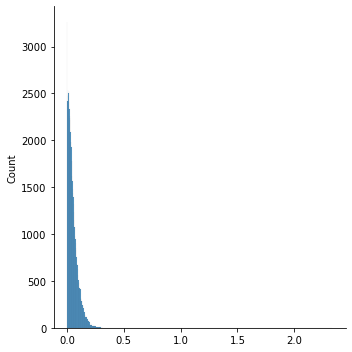

In [84]:
sns.displot(data_2019['tractsnap']/data_2019['pop2010'])

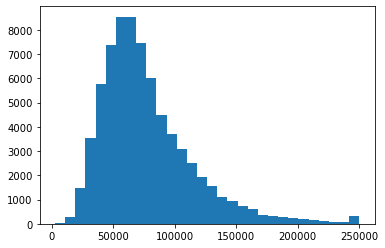

In [85]:
plt.hist(data_2019['medianfamilyincome'], bins=30);

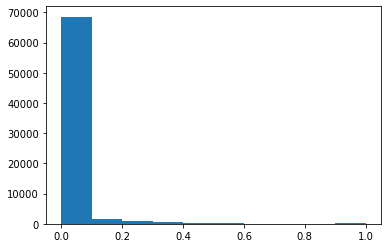

In [86]:
plt.hist(data_2010['pctgqtrs']);

In [87]:
data_2010['lowincometracts'].value_counts(normalize=True)

0    0.598087
1    0.401913
Name: lowincometracts, dtype: float64

In [88]:
pd.set_option('display.max_columns', None)

In [89]:
data_2019[~data_2019['medianfamilyincome'].isnull()].sort_values('pop2010', ascending=False).head(25)

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
9692,6073018700,California,San Diego County,0,37452,6016,0,16575.0,44.256649,0,0,0,0,0,1,6.740714,41996.0,0,0,0,0,0,0,0,0,1.295641,1.295641,NaN,0.678117,0.678117,NaN,37451.999861,100.000000,19601.754924,52.338340,9083.999940,24.255046,29.000000,0.077432,28477.000102,76.035993,2936.000004,7.839368,1082.000008,2.889031,311.000000,0.830396,510.999999,1.364413,4134.999997,11.040799,8192.000008,21.873331,0.000000,0.000000,222.199214,3.693471,37060.980422,98.955945,19397.101842,51.791899,8906.946313,23.782298,27.954446,0.074641,28164.983981,75.202884,2917.226439,7.789241,1071.707360,2.861549,310.681123,0.829545,505.421283,1.349517,4090.960486,10.923210,8103.448153,21.636890,0.000000,0.000000,218.115562,3.625591,1.295641,0.003459,0.678117,0.001811,0.0,0.0,0.0,0.0,0.971731,0.002595,0.32391,0.000865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161955,0.000432,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11639.0,9084.0,29.0,28477.0,2936.0,1082.0,311.0,511.0,4135.0,8192.0,0.0,254.0
63202,48157673101,Texas,Fort Bend County,1,33201,10124,0,188.0,0.566248,0,0,0,0,1,0,3.091519,156440.0,1,1,1,1,1,0,0,1,4851.071193,20984.713946,4851.071193,327.615893,1557.504505,327.615893,20984.713946,63.205066,1557.504505,4.691137,7410.393049,22.319789,963.957665,2.903399,15594.437828,46.969784,1405.866624,4.234410,2661.261514,8.015607,15.822998,0.047658,81.941461,0.246804,1225.383553,3.690803,3731.254954,11.238381,101.057870,0.998201,79.804320,0.788269,4851.071193,14.611220,327.615893,0.986765,1697.944571,5.114137,230.986471,0.695721,3631.096045,10.936707,349.540396,1.052801,571.518901,1.721391,3.974466,0.011971,19.644219,0.059168,275.297187,0.829183,747.605421,2.251756,33.533499,0.331228,18.085398,0.178639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5606.0,11845.0,1604.0,24291.0,2361.0,4370.0,19.0,128.0,2032.0,6380.0,219.0,245.0
17954,12115002712,Florida,Sarasota County,1,33041,11977,0,0.0,0.000000,0,0,0,0,1,0,8.793223,71237.0,1,1,1,1,1,0,0,1,27226.505623,32582.14

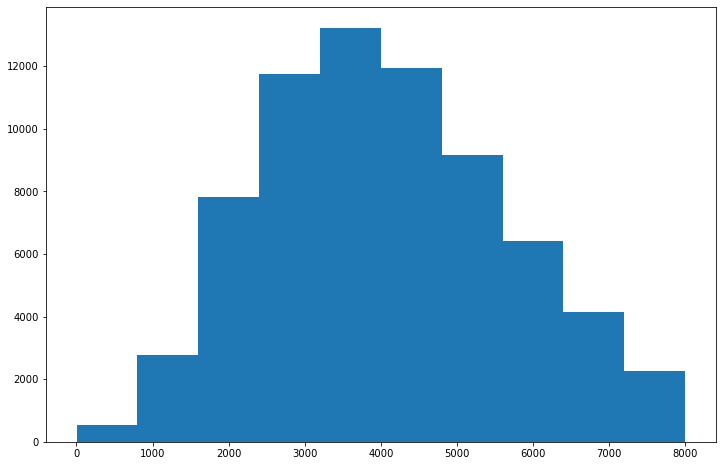

In [90]:
plt.figure(figsize=(12,8))
plt.hist(data_2019[data_2019['pop2010'] <= 8000]['pop2010']);

----

### Map zip to census_tract

In [91]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [92]:
zip_2010 = pd.read_excel('datasets/zip_tracts/ZIP_TRACT_032010.xlsx', dtype='category')

/Users/kei/opt/anaconda3/envs/geopandas/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/kei/opt/anaconda3/envs/geopandas/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/kei/opt/anaconda3/envs/geopandas/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/kei/opt/anaconda3/envs/geopandas/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:761:

In [93]:
zip_2019 = pd.read_excel('datasets/zip_tracts/ZIP_TRACT_032019.xlsx', dtype='category')

/Users/kei/opt/anaconda3/envs/geopandas/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/kei/opt/anaconda3/envs/geopandas/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/kei/opt/anaconda3/envs/geopandas/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/kei/opt/anaconda3/envs/geopandas/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:761:

In [94]:
zip_2010.columns = zip_2010.columns.str.lower()

In [95]:
zip_2010.head()

,zip,tract,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,00501,36103158607,0.000000,1.000000,0.000000,1.000000
1,00544,36103158607,0.000000,1.000000,0.000000,1.000000
2,00601,72001956300,0.004316,0.005063,0.000000,0.004310
3,00601,72001956600,0.728760,0.448101,0.546667,0.703202
4,00601,72001956700,0.266924,0.546835,0.453333,0.292488


In [96]:
zip_2010[['res_ratio', 'bus_ratio','oth_ratio', 'tot_ratio']] = zip_2010[['res_ratio', 'bus_ratio','oth_ratio', 'tot_ratio']].astype(np.float64)

In [97]:
zip_2010.dtypes

zip          category
tract        category
res_ratio     float64
bus_ratio     float64
oth_ratio     float64
tot_ratio     float64
dtype: object

In [98]:
zip_2019.head()

,zip,tract,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,00601,72001956600,0.167449,0.366569,0.412281,0.183442
1,00601,72001956300,0.005238,0.005865,0.008772,0.005341
2,00601,72113071700,0.192738,0.202346,0.131579,0.192122
3,00601,72001956800,0.014812,0.014663,0.052632,0.015523
4,00601,72001956700,0.619762,0.410557,0.394737,0.603572


In [99]:
zip_2019[['res_ratio', 'bus_ratio','oth_ratio', 'tot_ratio']] = zip_2019[['res_ratio', 'bus_ratio','oth_ratio', 'tot_ratio']].astype(np.float64)

In [100]:
zip_2019.dtypes

zip          category
tract        category
res_ratio     float64
bus_ratio     float64
oth_ratio     float64
tot_ratio     float64
dtype: object

In [101]:
data_2019.head()

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,0,0,0,0,0,11.336453,81250.0,1,1,1,1,1,0,0,0,1896.493338,1912.000004,1896.493338,460.998748,466.972228,460.998748,1912.000004,100.000000,466.972228,24.423234,507.000002,26.516736,221.000002,11.558578,1622.000008,84.832636,216.999999,11.349372,14.000000,0.732218,0.000000,0.000000,14.000000,0.732218,45.000000,2.353556,44.000000,2.301255,5.490446,0.792272,92.400001,13.333333,1896.493338,99.188982,460.998748,24.110813,503.506034,26.333998,218.674825,11.436968,1610.956368,84.255040,213.631073,11.173173,13.800985,0.721809,0.000000,0.000000,14.000000,0.732218,44.104914,2.306742,43.365253,2.268057,5.490446,0.792272,91.580907,13.215138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.0,507.0,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,1,1,0,0,1,17.876788,49000.0,1,1,1,1,1,0,0,0,1260.991651,2169.999998,1260.991651,603.892737,962.199453,603.892737,2169.999998,100.000000,962.199453,44.340989,606.000004,27.926267,214.000001,9.861751,888.000003,40.921659,1216.999994,56.082949,5.000000,0.230415,0.000000,0.000000,5.000000,0.230415,55.000001,2.534562,75.000001,3.456221,92.673554,12.472887,161.207233,21.696801,1260.991651,58.110214,603.892737,27.829158,405.660951,18.694053,126.604568,5.834312,356.617747,16.433998,854.189485,39.363571,4.000000,0.184332,0.000000,0.000000,4.396176,0.202589,41.788244,1.925726,32.980882,1.519856,66.903537,9.004514,96.208100,12.948600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,802.0,606.0,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,0,0,0,0,0,15.046030,62609.0,1,1,1,1,1,0,0,0,1551.703935,2856.859242,1551.703935,478.260886,971.112475,478.260886,2856.859242,84.697873,971.112475,28.790764,771.040463,22.859190,357.634554,10.

In [102]:
zip_2010.shape

(145629, 6)

In [103]:
zip_2019.shape

(170150, 6)

In [104]:
data_2019.censustract = data_2019.censustract.astype('category').apply(lambda x: '0'+ str(x) if len(str(x))==10 else x)
data_2010.censustract = data_2010.censustract.astype('category').apply(lambda x: '0'+ str(x) if len(str(x))==10 else x)

In [105]:
data_2010_zip = pd.merge(data_2010, zip_2010, how='left', left_on='censustract', right_on='tract')
# .dropna(subset=['zip','tract','res_ratio','bus_ratio','oth_ratio','tot_ratio'])
data_2019_zip = pd.merge(data_2019, zip_2019, how='left', left_on='censustract', right_on='tract')
# .dropna(subset=['zip','tract','res_ratio','bus_ratio','oth_ratio','tot_ratio'])

In [106]:
data_2010.shape

(72864, 65)

In [107]:
data_2010_zip.shape

(81230, 71)

In [108]:
data_2019_zip.shape

(86237, 153)

In [109]:
len(zip_2019.tract)

170150

In [110]:
zip_2019.tract.nunique()

73488

In [111]:
data_2010_zip.columns

Index(['censustract', 'state', 'county', 'lilatracts_1and10',
       'lilatracts_halfand10', 'lilatracts_1and20', 'lilatracts_vehicle',
       'urban', 'rural', 'la1and10', 'lahalfand10', 'la1and20',
       'latracts_half', 'latracts1', 'latracts10', 'latracts20',
       'latractsvehicle_20', 'hunvflag', 'groupquartersflag', 'ohu2010',
       'numgqtrs', 'pctgqtrs', 'lowincometracts', 'pop2010', 'uatyp10',
       'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare',
       'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare',
       'lahunvhalf', 'lahunvhalfshare', 'lapop1', 'lapop1share', 'lalowi1',
       'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1',
       'laseniors1share', 'lahunv1', 'lahunv1share', 'lapop10', 'lapop10share',
       'lalowi10', 'lalowi10share', 'lakids10', 'lakids10share', 'laseniors10',
       'laseniors10share', 'lahunv10', 'lahunv10share', 'lapop20',
       'lapop20share', 'lalowi20', 'lalowi20share', 'lakids20',
       'l

In [112]:
col_diff = [i for i in data_2019_zip.columns if i not in data_2010_zip.columns ]
col_diff

['povertyrate',
 'medianfamilyincome',
 'lapop1_10',
 'lapop05_10',
 'lapop1_20',
 'lalowi1_10',
 'lalowi05_10',
 'lalowi1_20',
 'lawhitehalf',
 'lawhitehalfshare',
 'lablackhalf',
 'lablackhalfshare',
 'laasianhalf',
 'laasianhalfshare',
 'lanhopihalf',
 'lanhopihalfshare',
 'laaianhalf',
 'laaianhalfshare',
 'laomultirhalf',
 'laomultirhalfshare',
 'lahisphalf',
 'lahisphalfshare',
 'lasnaphalf',
 'lasnaphalfshare',
 'lawhite1',
 'lawhite1share',
 'lablack1',
 'lablack1share',
 'laasian1',
 'laasian1share',
 'lanhopi1',
 'lanhopi1share',
 'laaian1',
 'laaian1share',
 'laomultir1',
 'laomultir1share',
 'lahisp1',
 'lahisp1share',
 'lasnap1',
 'lasnap1share',
 'lawhite10',
 'lawhite10share',
 'lablack10',
 'lablack10share',
 'laasian10',
 'laasian10share',
 'lanhopi10',
 'lanhopi10share',
 'laaian10',
 'laaian10share',
 'laomultir10',
 'laomultir10share',
 'lahisp10',
 'lahisp10share',
 'lasnap10',
 'lasnap10share',
 'lawhite20',
 'lawhite20share',
 'lablack20',
 'lablack20share',
 'la

In [113]:
col_same = [i for i in data_2010_zip.columns if i in data_2019_zip.columns ]
col_same

['censustract',
 'state',
 'county',
 'lilatracts_1and10',
 'lilatracts_halfand10',
 'lilatracts_1and20',
 'lilatracts_vehicle',
 'urban',
 'la1and10',
 'lahalfand10',
 'la1and20',
 'latracts_half',
 'latracts1',
 'latracts10',
 'latracts20',
 'latractsvehicle_20',
 'hunvflag',
 'groupquartersflag',
 'ohu2010',
 'numgqtrs',
 'pctgqtrs',
 'lowincometracts',
 'pop2010',
 'lapophalf',
 'lapophalfshare',
 'lalowihalf',
 'lalowihalfshare',
 'lakidshalf',
 'lakidshalfshare',
 'laseniorshalf',
 'laseniorshalfshare',
 'lahunvhalf',
 'lahunvhalfshare',
 'lapop1',
 'lapop1share',
 'lalowi1',
 'lalowi1share',
 'lakids1',
 'lakids1share',
 'laseniors1',
 'laseniors1share',
 'lahunv1',
 'lahunv1share',
 'lapop10',
 'lapop10share',
 'lalowi10',
 'lalowi10share',
 'lakids10',
 'lakids10share',
 'laseniors10',
 'laseniors10share',
 'lahunv10',
 'lahunv10share',
 'lapop20',
 'lapop20share',
 'lalowi20',
 'lalowi20share',
 'lakids20',
 'lakids20share',
 'laseniors20',
 'laseniors20share',
 'lahunv20',
 

In [114]:
col_2010 = col_same[:7]+['hunvflag']

In [115]:
col_2019 = col_same[:7]+['hunvflag', 'tracthunv', 'povertyrate',]
col_2019

['censustract',
 'state',
 'county',
 'lilatracts_1and10',
 'lilatracts_halfand10',
 'lilatracts_1and20',
 'lilatracts_vehicle',
 'hunvflag',
 'tracthunv',
 'povertyrate']

In [116]:
df_2019_small = data_2019[col_2019]

In [117]:
df_2010_small = data_2010[col_2010]

In [118]:
df_2010_small

,censustract,state,county,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag
0,01001020100,AL,Autauga,0,0,0,0,0
1,01001020200,AL,Autauga,0,0,0,0,0
2,01001020300,AL,Autauga,0,0,0,0,0
3,01001020400,AL,Autauga,0,0,0,0,0
4,01001020500,AL,Autauga,0,0,0,0,1
...,...,...,...,...,...,...,...,...
72859,56043000200,WY,Washakie,0,0,0,0,0
72860,56043000301,WY,Washakie,0,1,0,0,0
72861,56043000302,WY,Washakie,0,0,0,0,0
72862,56045951100,WY,Weston,0,0,0,0,0


----

In [119]:
a = df_2010_small[['censustract','lilatracts_1and10']].loc[df_2010_small.censustract.isin(set(df_2019_small.censustract))]
a

,censustract,lilatracts_1and10
0,01001020100,0
1,01001020200,0
2,01001020300,0
3,01001020400,0
4,01001020500,0
...,...,...
72859,56043000200,0
72860,56043000301,0
72861,56043000302,0
72862,56045951100,0


In [120]:
b = df_2019_small[['censustract','lilatracts_1and10']].loc[df_2019_small.censustract.isin(set(df_2010_small.censustract))]
b

,censustract,lilatracts_1and10
0,01001020100,0
1,01001020200,1
2,01001020300,0
3,01001020400,0
4,01001020500,0
...,...,...
72526,56043000200,0
72527,56043000301,0
72528,56043000302,0
72529,56045951100,0


In [121]:
a.lilatracts_1and10.value_counts(normalize=1)

0    0.876534
1    0.123466
Name: lilatracts_1and10, dtype: float64

In [122]:
b.lilatracts_1and10.value_counts(normalize=1)

0    0.871886
1    0.128114
Name: lilatracts_1and10, dtype: float64

In [123]:
a = a.reset_index().drop(columns='index')

In [124]:
b = b.reset_index().drop(columns='index')

In [125]:
changed_tract_lilatracts_1and10 = list(a[a.lilatracts_1and10 != b.lilatracts_1and10].censustract)
len(changed_tract_lilatracts_1and10)

6407

In [126]:
data_2010_dc = data_2010[data_2010['state']=='DC']
data_2019_dc = data_2019[data_2019['state']=='District of Columbia']

In [127]:
data_2010_dc[data_2010_dc.lilatracts_1and10==0].censustract

13901    11001000100
13902    11001000201
13903    11001000202
13904    11001000300
13905    11001000400
            ...     
14074    11001010600
14075    11001010700
14076    11001010800
14077    11001010900
14078    11001011000
Name: censustract, Length: 170, dtype: category
Categories (72864, object): ['01001020100', '01001020200', '01001020300', '01001020400', ..., 56043000301, 56043000302, 56045951100, 56045951300]

In [149]:
data_2019_dc[data_2019_dc.lilatracts_1and10==1].censustract

13950    11001007301
13952    11001007401
13963    11001007603
13969    11001007709
13971    11001007804
13972    11001007806
13974    11001007808
13975    11001007809
14008    11001009601
14021    11001009902
14022    11001009903
14030    11001010400
Name: censustract, dtype: category
Categories (72531, object): ['01001020100', '01001020200', '01001020300', '01001020400', ..., 56043000301, 56043000302, 56045951100, 56045951300]

In [128]:
data_2019_dc[(data_2019_dc.lilatracts_1and10==1) & (data_2019_dc.censustract.isin(data_2010_dc[data_2010_dc.lilatracts_1and10==0].censustract))]


,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
13950,11001007301,District of Columbia,District of Columbia,1,3012,812,0,483.0,16.035857,1,1,1,0,0,1,5.406699,87367.0,1,1,1,1,1,0,0,0,1983.693850,3011.999960,1983.693850,401.009882,608.885156,401.009882,3011.999960,99.999999,608.885156,20.215311,947.999983,31.474103,14.000000,0.464807,1790.999959,59.462150,766.999992,25.464807,109.999998,3.652058,13.0,0.431607,21.000000,0.697211,309.999997,10.292165,390.999992,12.981407,55.824998,6.875000,19.031249,2.343750,1983.693850,65.859690,401.009882,13.313741,602.484071,20.002791,10.121893,0.336052,1186.770399,39.401408,503.009365,16.700178,68.635008,2.278719,4.0,0.132802,17.752941,0.589407,203.526129,6.757176,238.486073,7.917864,34.230841,4.215621,11.669605,1.437143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,845.0,948.0,14.0,1791.0,767.0,110.0,13.0,21.0,310.0,391.0,88.0,30.0
13952,11001007401,District of Columbia,District of Columbia,1,2414,771,0,19.0,0.787075,1,1,1,1,1,1,70.042644,14422.0,1,1,1,1,1,0,0,1,2178.308013,2413.999970,2178.308013,1968.424994,2178.309183,1968.424994,2413.999970,99.999999,2178.309183,90.236503,945.999993,39.188069,125.000000,5.178128,17.000000,0.704225,2348.999979,97.307373,5.000000,0.207125,0.0,0.000000,10.000000,0.414250,33.000000,1.367026,30.999999,1.284176,561.111972,72.777169,480.463378,62.316910,2178.308013,90.236455,1968.424994,81.542046,878.484274,36.391229,104.188198,4.315998,16.242106,0.672830,2117.509876,87.717890,4.845523,0.200726,0.0,0.000000,9.000771,0.372857,30.709746,1.272152,27.754043,1.149712,508.534707,65.957809,435.540981,56.490400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1655.0,946.0,125.0,17.0,2349.0,5.0,0.0,10.0,33.0,31.0,557.0,468.0
13969,11001007709,District of Columbia,District of Columbia,1,2007,979,0,17.0,0.847035,1,1,1,1,1,1,28.613078,35500.0,1,1,1,1,1,0,0,1,810.413608,2007.000007,810.413608,427.196611,1085.880011,427.196611,2007.000007,

In [129]:
def get_lila_0_1(state,state_abr, metric):
    
    data_2010_state = data_2010[data_2010['state']==state_abr]
    data_2019_state = data_2019[data_2019['state']==state]
    
    return data_2019_state[(data_2019_state[metric]==1) & 
                           (data_2019_state.censustract.isin(data_2010_state[data_2010_state[metric]==0].censustract))]

In [130]:
def get_lila_1_0(state,state_abr, metric):
    
    data_2010_state = data_2010[data_2010['state']==state_abr]
    data_2019_state = data_2019[data_2019['state']==state]
    
    return data_2019_state[(data_2019_state[metric]==0) & 
                           (data_2019_state.censustract.isin(data_2010_state[data_2010_state[metric]==1].censustract))]

In [131]:
get_lila_0_1('District of Columbia', 'DC', 'lilatracts_1and10')

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
13950,11001007301,District of Columbia,District of Columbia,1,3012,812,0,483.0,16.035857,1,1,1,0,0,1,5.406699,87367.0,1,1,1,1,1,0,0,0,1983.693850,3011.999960,1983.693850,401.009882,608.885156,401.009882,3011.999960,99.999999,608.885156,20.215311,947.999983,31.474103,14.000000,0.464807,1790.999959,59.462150,766.999992,25.464807,109.999998,3.652058,13.0,0.431607,21.000000,0.697211,309.999997,10.292165,390.999992,12.981407,55.824998,6.875000,19.031249,2.343750,1983.693850,65.859690,401.009882,13.313741,602.484071,20.002791,10.121893,0.336052,1186.770399,39.401408,503.009365,16.700178,68.635008,2.278719,4.0,0.132802,17.752941,0.589407,203.526129,6.757176,238.486073,7.917864,34.230841,4.215621,11.669605,1.437143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,845.0,948.0,14.0,1791.0,767.0,110.0,13.0,21.0,310.0,391.0,88.0,30.0
13952,11001007401,District of Columbia,District of Columbia,1,2414,771,0,19.0,0.787075,1,1,1,1,1,1,70.042644,14422.0,1,1,1,1,1,0,0,1,2178.308013,2413.999970,2178.308013,1968.424994,2178.309183,1968.424994,2413.999970,99.999999,2178.309183,90.236503,945.999993,39.188069,125.000000,5.178128,17.000000,0.704225,2348.999979,97.307373,5.000000,0.207125,0.0,0.000000,10.000000,0.414250,33.000000,1.367026,30.999999,1.284176,561.111972,72.777169,480.463378,62.316910,2178.308013,90.236455,1968.424994,81.542046,878.484274,36.391229,104.188198,4.315998,16.242106,0.672830,2117.509876,87.717890,4.845523,0.200726,0.0,0.000000,9.000771,0.372857,30.709746,1.272152,27.754043,1.149712,508.534707,65.957809,435.540981,56.490400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1655.0,946.0,125.0,17.0,2349.0,5.0,0.0,10.0,33.0,31.0,557.0,468.0
13969,11001007709,District of Columbia,District of Columbia,1,2007,979,0,17.0,0.847035,1,1,1,1,1,1,28.613078,35500.0,1,1,1,1,1,0,0,1,810.413608,2007.000007,810.413608,427.196611,1085.880011,427.196611,2007.000007,

In [141]:
get_lila_1_0('District of Columbia', 'DC', 'lilatracts_1and10')

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
13891,11001002102,District of Columbia,District of Columbia,1,4648,1900,0,16.0,0.344234,0,0,0,0,0,0,16.682813,109970.0,0,0,0,0,0,0,0,0,NaN,283.313251,NaN,NaN,67.917560,NaN,283.313251,6.095380,67.917560,1.461221,56.062146,1.206156,45.258495,0.973720,33.047575,0.711006,218.649242,4.704158,4.766099,0.102541,0.00000,0.000000,0.000000,0.000000,26.850337,0.577675,32.117238,0.690990,41.653889,2.192310,19.833152,1.043850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1220.0,996.0,710.0,398.0,3583.0,27.0,0.0,15.0,625.0,724.0,410.0,302.0
14001,11001009501,District of Columbia,District of Columbia,1,5797,1802,0,2017.0,34.793859,0,1,0,1,1,1,12.695925,49177.0,0,1,0,1,0,0,0,1,NaN,5013.179248,NaN,NaN,2546.869737,NaN,5013.179248,86.478855,2546.869737,43.934272,697.585288,12.033557,470.290881,8.112660,1425.879054,24.596844,2808.752320,48.451825,77.725442,1.340787,9.58528,0.165349,34.755840,0.599549,656.481287,11.324500,772.939205,13.333435,597.023201,33.131143,496.757123,27.566988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2523.0,698.0,479.0,2128.0,2827.0,108.0,10.0,36.0,688.0,831.0,610.0,517.0
14037,11001011100,District of Columbia,District of Columbia,1,4859,1727,0,564.0,11.607327,0,0,0,0,1,0,15.378859,98168.0,0,1,0,1,0,0,0,1,2.371825,2526.520300,2.371825,1.201747,693.765411,1.201747,2526.520300,51.996713,693.765411,14.277946,509.931838,10.494584,494.793588,10.183033,172.169451,3.543310,2139.108889,44.023645,10.271163,0.211384,1.00000,0.020580,10.095865,0.207777,193.874921,3.990017,201.011222,4.136885,177.569748,10.281977,97.106101,5.622820,2.371825,0.048813,1.201747,0.024732,0.988261,0.020339,0.197652,0.004068,0.0,0.0,2.371825,0.048813,0.0,0.0,0.0,

In [132]:
get_lila_0_1('Florida', 'FL', 'lilatracts_1and10')

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
14043,12001000600,Florida,Alachua County,1,4350,1556,0,12.0,0.275862,1,1,1,1,1,1,34.431312,37670.0,1,1,1,1,1,0,0,1,905.407223,2612.901515,905.407223,635.713846,1694.322952,635.713846,2612.901515,60.066702,1694.322952,38.949953,932.637876,21.439951,244.819929,5.628044,187.707632,4.315118,2331.817063,53.604990,15.196573,0.349347,0.000000,0.000000,4.226900,0.097170,73.953359,1.700077,55.571314,1.277501,154.678027,9.940747,263.900287,16.960173,905.407223,20.813959,635.713846,14.614111,399.657941,9.187539,41.949871,0.964365,71.793044,1.650415,786.606568,18.082910,0.000000,0.000000,0.000000,0.000000,0.559121,0.012853,46.448485,1.067781,17.469258,0.401592,48.079426,3.089937,92.034016,5.914782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3019.0,1511.0,463.0,256.0,3961.0,16.0,0.0,5.0,112.0,95.0,231.0,426.0
14105,12005000803,Florida,Bay County,1,5146,2045,0,73.0,1.418578,1,1,1,0,0,1,28.595979,47281.0,1,1,1,1,1,0,0,0,1311.158619,2699.210415,1311.158619,720.976020,1304.280739,720.976020,2699.210415,52.452593,1304.280739,25.345525,733.828364,14.260170,316.337290,6.147246,1936.373845,37.628718,504.623901,9.806139,85.117582,1.654053,3.000000,0.058298,33.946563,0.659669,136.148510,2.645715,147.962768,2.875297,37.448641,1.831229,308.453315,15.083292,1311.158619,25.479180,720.976020,14.010416,354.592702,6.890647,172.386245,3.349908,930.543639,18.082853,262.864002,5.108123,39.802802,0.773471,2.048055,0.039799,23.957397,0.465554,51.942707,1.009380,68.740466,1.335804,19.554817,0.956226,148.916397,7.281975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2855.0,1290.0,680.0,3703.0,1004.0,151.0,3.0,54.0,231.0,266.0,74.0,623.0
14109,12005000900,Florida,Bay County,1,4265,1841,0,4.0,0.093787,1,1,1,0,0,1,16.583935,51087.0,1,1,1,1,1,0,0,0,1964.017336,3462.344490,1964.017336,901.345030,1352.824013,901.345030,3462.344490,81.180410,1352.824013,31.719203,740.379879,17.35943

In [133]:
get_lila_0_1('California', 'CA', 'lilatracts_1and10')

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
3645,06001409000,California,Alameda County,1,3552,984,0,50.0,1.407658,1,1,1,0,0,1,20.416025,59750.0,1,1,1,1,1,0,0,0,1776.149741,3551.999991,1776.149741,795.068373,1476.461426,795.068373,3551.999991,100.000000,1476.461426,41.567045,1066.999995,30.039414,302.000000,8.502252,731.999997,20.608108,1569.999993,44.200450,130.000001,3.659910,30.000000,0.844595,24.000000,0.675676,1065.999994,30.011261,1732.999983,48.789414,60.767990,6.175609,107.823204,10.957643,1776.149741,50.004216,795.068373,22.383682,508.125264,14.305328,185.452041,5.221060,344.578110,9.700960,852.346998,23.996256,88.174720,2.482396,22.833212,0.642827,11.251634,0.316769,456.965066,12.865007,775.286756,21.826767,22.817183,2.318819,52.360180,5.321156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1621.0,1067.0,302.0,732.0,1570.0,130.0,30.0,24.0,1066.0,1733.0,67.0,119.0
3660,06001410500,California,Alameda County,1,2193,848,0,50.0,2.279982,1,1,1,1,1,1,41.255794,27950.0,1,1,1,1,1,0,0,1,1448.438648,2160.529440,1448.438648,991.261832,1478.592407,991.261832,2160.529440,98.519354,1478.592407,67.423274,629.470895,28.703643,170.000001,7.751938,174.297973,7.947924,1368.241712,62.391323,370.494868,16.894431,4.000000,0.182399,13.000000,0.592795,230.494865,10.510482,200.000001,9.119927,246.088251,29.019841,322.767920,38.062255,1448.438648,66.048274,991.261832,45.201178,489.390802,22.316042,95.876878,4.371951,60.013616,2.736599,913.958363,41.676168,311.235676,14.192233,3.000000,0.136799,7.356576,0.335457,152.874401,6.971017,136.499805,6.224341,169.371525,19.973057,222.146709,26.196546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624.0,638.0,170.0,188.0,1384.0,372.0,4.0,13.0,232.0,200.0,276.0,362.0
3721,06001428700,California,Alameda County,1,4119,1176,0,615.0,14.930808,1,1,1,0,0,1,18.783197,78906.0,1,1,1,1,1,0,0,0,634.020979,1302.340524,634.020979,420.058567,857.227355,420.058567,1302.340524,3

In [134]:
get_lila_0_1('New York', 'NY', 'lilatracts_1and10')

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
42869,36001000100,New York,Albany County,1,2139,784,0,79.0,3.693315,1,1,1,1,1,1,32.462312,45515.0,1,1,1,1,1,0,0,1,2138.999986,2138.999986,2138.999986,1246.156787,1246.156787,1246.156787,2138.999986,99.999999,1246.156787,58.258849,643.999992,30.107527,217.999999,10.191678,505.999998,23.655914,1395.999990,65.264142,55.000000,2.571295,0.000000,0.000000,9.000000,0.420757,172.999998,8.087891,197.999997,9.256662,172.046062,21.944651,258.523296,32.974910,2138.999986,99.999999,1246.156787,58.258849,643.999992,30.107527,217.999999,10.191678,505.999998,23.655914,1395.999990,65.264142,55.000000,2.571295,0.000000,0.000000,9.000000,0.420757,172.999998,8.087891,197.999997,9.256662,172.046062,21.944651,258.523296,32.974910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1183.0,644.0,218.0,506.0,1396.0,55.0,0.0,9.0,173.0,198.0,179.0,276.0
42902,36001013400,New York,Albany County,1,2430,1111,0,0.0,0.000000,1,1,1,1,1,1,6.906907,61458.0,1,1,1,1,1,0,0,1,1764.555325,2429.592918,1764.555325,483.171309,729.372717,483.171309,2429.592918,99.983248,729.372717,30.015338,502.796458,20.691212,314.999999,12.962963,2115.999990,87.078189,187.592922,7.719873,24.000000,0.987654,0.000000,0.000000,8.000000,0.329218,94.000000,3.868313,109.694691,4.514185,149.805779,13.483868,185.497077,16.696407,1764.555325,72.615445,483.171309,19.883593,376.364529,15.488252,206.379812,8.492996,1507.153252,62.022768,150.475811,6.192420,23.000000,0.946502,0.000000,0.000000,7.439116,0.306136,76.487138,3.147619,93.687081,3.855435,98.444512,8.860892,133.775668,12.041014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,693.0,503.0,315.0,2116.0,188.0,24.0,0.0,8.0,94.0,110.0,150.0,178.0
42956,36003951300,New York,Allegany County,0,3639,1486,0,0.0,0.000000,1,1,0,0,0,1,15.421755,57604.0,1,1,0,0,0,1,0,0,1420.423222,1420.423222,NaN,477.920239,477.920239,NaN,3638.156921,99.976832,1344.884043,36.957517,871.9063

In [135]:
dc_shape = gpd.read_file('tl_2019_11_tract/tl_2019_11_tract.shp')
dc_shape

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,11,001,010900,11001010900,109,Census Tract 109,G5020,S,2380956,2935327,+38.8132364,-077.0238475,"POLYGON ((-77.03919 38.80050, -77.03913 38.800..."
1,11,001,010400,11001010400,104,Census Tract 104,G5020,S,2607546,7006,+38.8512514,-077.0009048,"POLYGON ((-77.00919 38.83918, -77.00915 38.839..."
2,11,001,009903,11001009903,99.03,Census Tract 99.03,G5020,S,383679,0,+38.8883180,-076.9212121,"POLYGON ((-76.93005 38.88982, -76.92797 38.889..."
3,11,001,009904,11001009904,99.04,Census Tract 99.04,G5020,S,426198,0,+38.8851712,-076.9311353,"POLYGON ((-76.93577 38.88596, -76.93524 38.885..."
4,11,001,000902,11001000902,9.02,Census Tract 9.02,G5020,S,1867106,307257,+38.9285125,-077.1077517,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,11,001,002101,11001002101,21.01,Census Tract 21.01,G5020,S,600992,0,+38.9559119,-077.0241312,"POLYGON ((-77.02824 38.95813, -77.02824 38.958..."
175,11,001,002900,11001002900,29,Census Tract 29,G5020,S,300632,0,+38.9338478,-077.0299131,"POLYGON ((-77.03273 38.93198, -77.03273 38.932..."
176,11,001,003100,11001003100,31,Census Tract 31,G5020,S,296909,0,+38.9306187,-077.0254232,"POLYGON ((-77.02826 38.93182, -77.02812 38.931..."
177,11,001,003200,11001003200,32,Census Tract 32,G5020,S,445441,0,+38.9322648,-077.0211710,"POLYGON ((-77.02431 38.93642, -77.02420 38.936..."


In [ ]:
# change geoid name to censustract


In [137]:
dc_lila1and10 = get_lila_0_1('District of Columbia', 'DC', 'lilatracts_1and10')
dc_lila1and10

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
13950,11001007301,District of Columbia,District of Columbia,1,3012,812,0,483.0,16.035857,1,1,1,0,0,1,5.406699,87367.0,1,1,1,1,1,0,0,0,1983.693850,3011.999960,1983.693850,401.009882,608.885156,401.009882,3011.999960,99.999999,608.885156,20.215311,947.999983,31.474103,14.000000,0.464807,1790.999959,59.462150,766.999992,25.464807,109.999998,3.652058,13.0,0.431607,21.000000,0.697211,309.999997,10.292165,390.999992,12.981407,55.824998,6.875000,19.031249,2.343750,1983.693850,65.859690,401.009882,13.313741,602.484071,20.002791,10.121893,0.336052,1186.770399,39.401408,503.009365,16.700178,68.635008,2.278719,4.0,0.132802,17.752941,0.589407,203.526129,6.757176,238.486073,7.917864,34.230841,4.215621,11.669605,1.437143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,845.0,948.0,14.0,1791.0,767.0,110.0,13.0,21.0,310.0,391.0,88.0,30.0
13952,11001007401,District of Columbia,District of Columbia,1,2414,771,0,19.0,0.787075,1,1,1,1,1,1,70.042644,14422.0,1,1,1,1,1,0,0,1,2178.308013,2413.999970,2178.308013,1968.424994,2178.309183,1968.424994,2413.999970,99.999999,2178.309183,90.236503,945.999993,39.188069,125.000000,5.178128,17.000000,0.704225,2348.999979,97.307373,5.000000,0.207125,0.0,0.000000,10.000000,0.414250,33.000000,1.367026,30.999999,1.284176,561.111972,72.777169,480.463378,62.316910,2178.308013,90.236455,1968.424994,81.542046,878.484274,36.391229,104.188198,4.315998,16.242106,0.672830,2117.509876,87.717890,4.845523,0.200726,0.0,0.000000,9.000771,0.372857,30.709746,1.272152,27.754043,1.149712,508.534707,65.957809,435.540981,56.490400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1655.0,946.0,125.0,17.0,2349.0,5.0,0.0,10.0,33.0,31.0,557.0,468.0
13969,11001007709,District of Columbia,District of Columbia,1,2007,979,0,17.0,0.847035,1,1,1,1,1,1,28.613078,35500.0,1,1,1,1,1,0,0,1,810.413608,2007.000007,810.413608,427.196611,1085.880011,427.196611,2007.000007,

In [138]:
dc_shape

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,11,001,010900,11001010900,109,Census Tract 109,G5020,S,2380956,2935327,+38.8132364,-077.0238475,"POLYGON ((-77.03919 38.80050, -77.03913 38.800..."
1,11,001,010400,11001010400,104,Census Tract 104,G5020,S,2607546,7006,+38.8512514,-077.0009048,"POLYGON ((-77.00919 38.83918, -77.00915 38.839..."
2,11,001,009903,11001009903,99.03,Census Tract 99.03,G5020,S,383679,0,+38.8883180,-076.9212121,"POLYGON ((-76.93005 38.88982, -76.92797 38.889..."
3,11,001,009904,11001009904,99.04,Census Tract 99.04,G5020,S,426198,0,+38.8851712,-076.9311353,"POLYGON ((-76.93577 38.88596, -76.93524 38.885..."
4,11,001,000902,11001000902,9.02,Census Tract 9.02,G5020,S,1867106,307257,+38.9285125,-077.1077517,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,11,001,002101,11001002101,21.01,Census Tract 21.01,G5020,S,600992,0,+38.9559119,-077.0241312,"POLYGON ((-77.02824 38.95813, -77.02824 38.958..."
175,11,001,002900,11001002900,29,Census Tract 29,G5020,S,300632,0,+38.9338478,-077.0299131,"POLYGON ((-77.03273 38.93198, -77.03273 38.932..."
176,11,001,003100,11001003100,31,Census Tract 31,G5020,S,296909,0,+38.9306187,-077.0254232,"POLYGON ((-77.02826 38.93182, -77.02812 38.931..."
177,11,001,003200,11001003200,32,Census Tract 32,G5020,S,445441,0,+38.9322648,-077.0211710,"POLYGON ((-77.02431 38.93642, -77.02420 38.936..."


In [145]:
dc_shape.GEOID = dc_shape.GEOID.apply(lambda x: int(x))

In [146]:
dc_lila1and10_shape = pd.merge(dc_shape, dc_lila1and10, left_on='GEOID', right_on='censustract')
dc_lila1and10_shape.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
0,11,001,009903,11001009903,99.03,Census Tract 99.03,G5020,S,383679,0,+38.8883180,-076.9212121,"POLYGON ((-76.93005 38.88982, -76.92797 38.889...",11001009903,District of Columbia,District of Columbia,1,1851,644,0,0.0,0.000000,1,1,1,1,1,1,15.466926,85179.0,1,1,1,1,1,0,0,1,1619.830635,1851.000015,1619.830635,586.855509,675.032188,586.855509,1851.000015,100.000001,675.032188,36.468514,493.000004,26.634252,224.000001,12.101567,17.000000,0.918422,1773.999996,95.840086,2.000000,0.108050,0.0,0.000000,3.0,0.162075,55.000000,2.971367,30.000000,1.620746,153.383470,23.817309,147.945945,22.972973,1619.830635,87.511109,586.855509,31.704782,432.570349,23.369549,193.623986,10.460507,14.205978,0.767476,1553.245518,83.913858,2.000000,0.108050,0.0,0.000000,2.301495,0.124338,48.077634,2.597387,27.904484,1.507536,132.651892,20.598120,130.539347,20.270085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,753.0,493.0,224.0,17.0,1774.0,2.0,0.0,3.0,55.0,30.0,165.0,153.0
1,11,001,007401,11001007401,74.01,Census Tract 74.01,G5020,S,1203296,200980,+38.8675208,-076.9991203,"POLYGON ((-77.00540 38.86879, -77.00341 38.870...",11001007401,District of Columbia,District of Columbia,1,2414,771,0,19.0,0.787075,1,1,1,1,1,1,70.042644,14422.0,1,1,1,1,1,0,0,1,2178.308013,2413.999970,2178.308013,1968.424994,2178.309183,1968.424994,2413.999970,99.999999,2178.309183,90.236503,945.999993,39.188069,125.000000,5.178128,17.000000,0.704225,2348.999979,97.307373,5.000000,0.207125,0.0,0.000000,10.0,0.414250,33.000000,1.367026,30.999999,1.284176,561.111972,72.777169,480.463378,62.316910,2178.308013,90.236455,1968.424994,81.542046,878.484274,36.391229,104.188198,4.315998,16.242106,0.672830,2117.509876,87.717890,4.845523,0.200726,0.0,0.000000,9.000771,0.372857,30.709746,1.272152,27.754043,1.149712,508.534707,65.957809,435.540981,56.490400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [147]:
dc_all_shape = pd.merge(dc_shape, data_2019_dc, left_on='GEOID', right_on='censustract')
dc_all_shape

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
0,11,001,010900,11001010900,109,Census Tract 109,G5020,S,2380956,2935327,+38.8132364,-077.0238475,"POLYGON ((-77.03919 38.80050, -77.03913 38.800...",11001010900,District of Columbia,District of Columbia,1,3211,1161,0,447.0,13.920897,0,1,0,1,1,1,32.521603,42481.0,0,1,0,1,0,0,0,1,33.837654,786.191604,33.837654,20.986269,487.599643,20.986269,786.191604,24.484323,487.599643,15.185289,122.637129,3.819282,25.549402,0.795684,34.309196,1.068489,719.033159,22.392811,7.299829,0.227338,0.000000,0.000000,2.189949,0.068201,23.359453,0.727482,16.789606,0.522878,139.719638,12.034422,107.975049,9.300176,33.837654,1.053804,20.986269,0.653574,5.278297,0.164382,1.099645,0.034246,1.476666,0.045988,30.947159,0.963786,0.314184,0.009785,0.0,0.0,0.094255,0.002935,1.005390,0.031311,0.722624,0.022505,6.013527,0.517961,4.647242,0.400279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2139.0,855.0,147.0,58.0,3055.0,15.0,0.0,6.0,77.0,47.0,646.0,556.0
1,11,001,010400,11001010400,104,Census Tract 104,G5020,S,2607546,7006,+38.8512514,-077.0009048,"POLYGON ((-77.00919 38.83918, -77.00915 38.839...",11001010400,District of Columbia,District of Columbia,1,4365,1528,0,641.0,14.684994,1,1,1,1,1,1,26.809955,49427.0,1,1,1,1,1,0,0,1,1018.500119,4186.316319,1018.500119,494.259879,2161.007545,494.259879,4186.316319,95.906445,2161.007545,49.507618,1002.406225,22.964633,367.234108,8.413153,110.062641,2.521481,3957.417949,90.662496,12.000000,0.274914,0.458933,0.010514,9.000000,0.206186,97.376796,2.230854,83.376797,1.910121,795.474959,52.059880,744.036408,48.693482,1018.500119,23.333336,494.259879,11.323250,278.145190,6.372169,86.267306,1.976341,12.774509,0.292658,969.831667,22.218366,4.682916,0.107283,0.0,0.0,0.332280,0.007612,30.878740,0.707417,17.685195,0.405159,223.001002,14.594306,207.081069,13.552426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

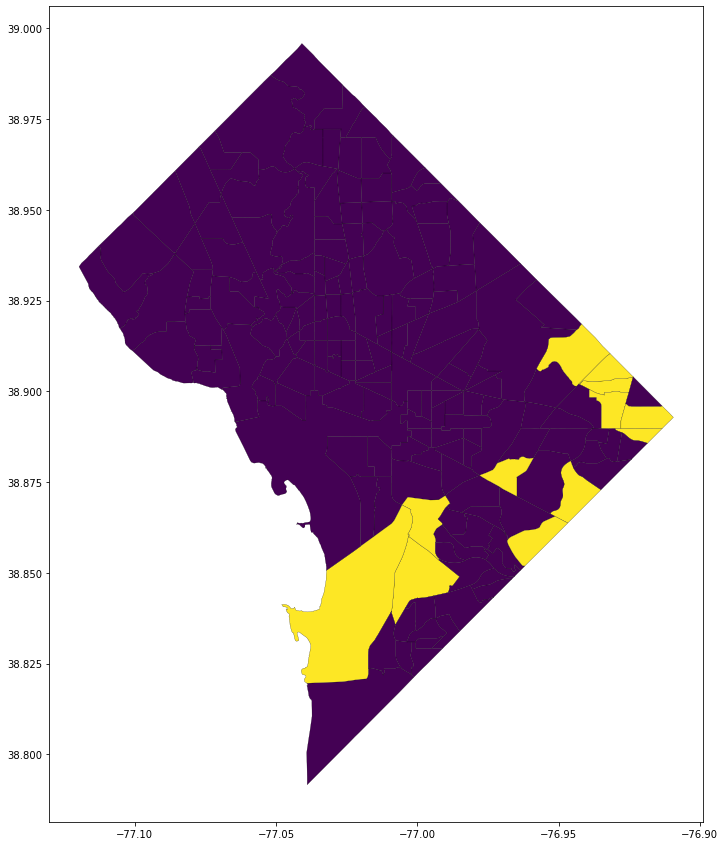

In [148]:
dc_1.plot(
    figsize=(15,15),
    column="lilatracts_1and10",
    cmap='viridis',
    edgecolor='black', 
    linewidth = 0.2
);